In [101]:
import import_ipynb
import matplotlib.pyplot as plt 
import numpy as np 
import random
import time 
import math
from scipy.interpolate import make_interp_spline, BSpline

importing Jupyter notebook from Internal_Regret_Matching_Algorithm.ipynb
importing Jupyter notebook from multiplicative_weights_algorithm.ipynb


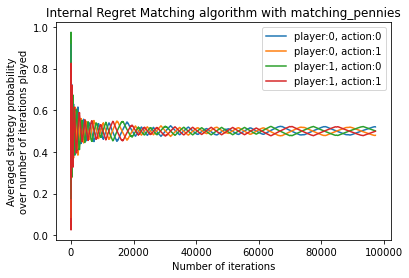

In [2]:
from Internal_Regret_Matching_Algorithm import internal_regret_matching_2, euclidean_distance
from multiplicative_weights_algorithm import no_of_actions, multiplicative_weights
from Internal_Regret_Matching_Algorithm import calculate_regret_up_to_time_2

## Games to be Analyzed

In [4]:
#todo:add relative frequency outcome 

matching_pennies = [[[1.0,-1.0], [-1.0, 1.0]], 
                    [[-1.0, 1.0], [1.0,-1.0]]]

schere_stein_papier = [[[0,0], [-1, 1], [1, -1]], 
                        [[1,-1], [0, 0], [-1, 1]],
                        [[-1,1], [1, -1], [0, 0]]]

test_game_2 = np.array([[[0,0], [-1, 1], [1, -1]], 
              [[1,-1], [0, 0], [-1, 1]]], dtype=object)

prisoners_dilemma = [[[3,3], [0, 5]],
                     [[5,0], [1, 1]]]

shapley_game = [[[1,0], [0, 1], [0, 0]], 
                [[0,0], [1, 0], [0, 1]],
                [[0,1], [0, 0], [1, 0]]]

# From: No-regret Dynamics and Fictitious Play: https://hal.archives-ouvertes.fr/hal-00713871/document
identical_interest_game = [[[2,2], [1,1],[-4,-4]],
                          [[1,1],[0,0],[-1,-1]],
                          [[-4,-4],[-1,-1],[-2,-2]]]

# From: No-regret Dynamics and Fictitious Play: https://hal.archives-ouvertes.fr/hal-00713871/document
eps = 0.5 

coordination_game = [[[1,1],[1,1],[0,0],[0,0]],
                    [[1-eps,1-eps],[1-eps,1-eps],[-eps,-eps],[-eps,-eps]],
                    [[0,0],[0,0],[1,1],[1,1]], 
                    [[-eps,-eps],[-eps,-eps],[1-eps,1-eps],[1-eps,1-eps]]]


expanded_chicken = np.array([[[6,6], [0,0], [2,7]],
                             [[0,0], [4,4], [3,0]],
                             [[7,2], [0,3], [0,0]]])

battle_of_sexes = np.array([[[2,1], [0,0]],
                            [[0,0], [1,2]]])

chicken = np.array([[[6,6], [2,7]],
                    [[7,2], [0,0]]])

#From https://arxiv.org/pdf/1207.0660.pdf
ficticious_play_cycles = [[[1, (math.sqrt(2))], [0,0]],
                         [[0,0], [(math.sqrt(2)),1]]]

#From gamut: 

#benefit of having the resource
#cost of interacting
BOR = 4
COI = 3
Hawk_and_Dowe = [[[0.5 * (BOR - COI), 0.5 * (BOR - COI)], [BOR, 0]], 
                [[0, BOR], [0.5 * BOR]]]

#two pure equilbria, one mixed 
# (A,A), (B,B), (0,75A, 0,75*A)
#https://de.wikipedia.org/wiki/Hirschjagd
stag_and_hare = [[[4,4], [0, 3]],[[3, 0], [3,3]]]

#see https://de.wikipedia.org/wiki/Hirschjagd
extended_stag_and_hare = [[[]]]

#from https://www.researchgate.net/publication/310470795_Melioration_Learning_in_Two-Person_Games
#inspection_game
#non zero sum, single mixed equilibrium 
#unique nash equilibrium (0.5 *A, 5/7 * A)

inspection_game = [[[8, 15], [15, 10],
                  [10,5],[10,10]]]

inspection_game_low_punishment = [[[-1, 5], [5,0]], 
                                   [[0,-5], [0,0]]]

inspection_game_high_punishment = [[[-20, 5], [5,0]], 
                                   [[0,-5], [0,0]]]

# a game with three nash equilibria 
# (A,A)(B,A),(B,B)
game_three_nash = [[[10, 10], [0,0]], 
                   [[10, 10], [10,10]]]

coordination_game_2 = [[[10, 10], [0,0]], 
                       [[0, 0], [8,8]]]






test_game = np.array([[[0,1],[2,3]],[[3,4],[5,6]]])
test_strategy = np.array([[0.06, 0.14], [0.24, 0.56]])

In [92]:
games = {"matching_pennies": matching_pennies, "shapley_game": shapley_game, 
         "schere_stein_papier":schere_stein_papier, "prisoners_dilemma": prisoners_dilemma}

nashEqs = games.copy()
nashEqs["matching_pennies"] = [np.full((2,2), 0.5)]
nashEqs["shapley_game"] = [np.full((2,3), 1/3)]
nashEqs["schere_stein_papier"] = [np.full((2,3), 1/3)]
nashEqs["prisoners_dilemma"] = [np.array([[0,1],[0,1]])]
nashEqs["game_three_nash"] = [np.array([[0,1],[0,1]]), np.array([[0,1],[1,0]]), np.array([[1,0],[1,0]])]
nashEqs["stag_and_hare"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]]), np.array([[0.75,0.25],[0.75,0.25]])]
nashEqs["battle_of_sexes"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]])]
nashEqs["chicken"] = [np.array([[1,0],[0,1]]), np.array([[0,1],[1,0]])]

In [6]:
games

{'matching_pennies': [[[1.0, -1.0], [-1.0, 1.0]], [[-1.0, 1.0], [1.0, -1.0]]],
 'shapley_game': [[[1, 0], [0, 1], [0, 0]],
  [[0, 0], [1, 0], [0, 1]],
  [[0, 1], [0, 0], [1, 0]]],
 'schere_stein_papier': [[[0, 0], [-1, 1], [1, -1]],
  [[1, -1], [0, 0], [-1, 1]],
  [[-1, 1], [1, -1], [0, 0]]],
 'prisoners_dilemma': [[[3, 3], [0, 5]], [[5, 0], [1, 1]]]}

## Generate IR & MW Results

In [7]:
# my > M^i  * (m^i -1) for all players i
# M^i >= abs(u^i(k, s^-i)- u^i(j, s^-i)) for all j, k (maximum absolute payoff - minimum absolute payoff)
# m^i = number of strategies player i
# return my for each player individually 
def choose_my(game):
    ret = []
    for i in range(2): 
        m_i = no_of_actions(game, i)
        flat_payoffs = np.transpose(game)[i].flatten()
        M_i = np.absolute(np.amax(flat_payoffs) - np.amin(flat_payoffs)) 
        ret.append(M_i * (m_i-1))
    return ret 

In [8]:
def choose_optimal_beta(game, iterations): 
    return 1/(math.sqrt(8*math.log(no_of_actions(game, 0))/iterations)+1)

In [9]:
choose_optimal_beta(shapley_game, 100000)

0.9907121602530613

In [10]:
def sample_from_distribution(probabilities):
    return random.choices(range(0,len(probabilities)), weights = probabilities)[0]

In [11]:
# generates a random initial distribution for a game 
def initial_random_distribution(game): 
    no_of_actions_p0 = no_of_actions (game, 0)
    no_of_actions_p1 = no_of_actions (game, 1)
    random_dist_p0 = np.random.random_sample(no_of_actions_p0)
    random_dist_p1 = np.random.random_sample(no_of_actions_p1)
    #normalize 
    random_dist_p0 = random_dist_p0 / sum(random_dist_p0)
    random_dist_p1 = random_dist_p1 / sum(random_dist_p1)
    
    return np.array([random_dist_p0.tolist(), random_dist_p1.tolist()], dtype = object)

In [12]:
def get_IR_MW_game_results(game, max_steps, epsilon): 
    init_distribution = initial_random_distribution(game)
    my = choose_my(game)
    beta = choose_optimal_beta(game,max_steps)
    # both return distributions and history of play
    IR = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
    MW_dis = multiplicative_weights(game, epsilon, beta, init_distribution, max_steps)
    MW_history = []
    for dis in MW_dis:
        p0_action = sample_from_distribution (dis[0])
        p1_action = sample_from_distribution (dis[1])
        MW_history.append([p0_action, p1_action])
    return (IR, (MW_dis,MW_history))

## Plot Results

In [13]:
# returns the history of strategy profiles for player
def get_history(player_no, history): 
    return [strategy[player_no] for strategy in history]

In [14]:
# plots a history of the mean distribution for each action of each player

def plot_history(history, game_name, algorithm): 
    
    hist_p0 = np.transpose(get_history(0, history))
    hist_p1 = np.transpose(get_history(1, history))
    
    fig, ax = plt.subplots()
    
    for action_no, action_history_p0 in enumerate(hist_p0):
        ax.plot(range(len(action_history_p0)), action_history_p0, label = f"player:1, action:{chr(65+action_no)}", linestyle = ':')
    
    for action_no, action_history_p1 in enumerate(hist_p1):
        ax.plot(range(len(action_history_p1)), action_history_p1, label =f"player:2, action:{chr(65+action_no+len(hist_p0))}", linestyle = '-')
    
    ax.set_title(f"{algorithm} with {game_name}")
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Averaged strategy probability')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_{algorithm}.png') 
    
    

In [15]:
def multiplicative_weights_plot(game, game_name, init_history, epsilon = 0.00001, max_steps = 100000): 
    beta = choose_optimal_beta(game,max_steps)
    mean_history = multiplicative_weights(game, epsilon, beta, init_history, max_steps)
    plot_history(mean_history, game_name, "Multiplicative Weights")

In [16]:
def internal_regret_matching_plot(game, game_name, init_distribution, max_steps = 100000, epsilon = 0.00001):
    my = choose_my(game)
    distributions, history = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
    plot_history(distributions, game_name, "Internal Regret Matching")

In [17]:
def plot_comparison_MWA_vs_IRM(game, game_name, init_distribution, epsilon = 0.000001, max_steps = 100000):
    internal_regret_matching_plot(game, game_name, init_distribution, max_steps , epsilon)
    multiplicative_weights_plot(game, game_name, init_distribution, epsilon, max_steps)

In [18]:
#https://de.wikipedia.org/wiki/Experimentelle_Konvergenzordnung
def experimental_order_of_convergence(mean_histories, expectedConvergence):
    eoc_values = []
    for i in range(len(mean_histories)-2):
        numerator = np.log(euclidean_distance(mean_histories[i+1], expectedConvergence) / euclidean_distance(mean_histories[i+2], expectedConvergence))
        denominator= np.log(euclidean_distance(mean_histories[i], expectedConvergence) / euclidean_distance(mean_histories[i+1], expectedConvergence))
        eoc_values.append(numerator / denominator)
    return np.mean(eoc_values)

In [19]:
def stepwise_mean_euclidean_distance(mean_histories, expectedConvergence): 
    return np.mean([euclidean_distance(history, expectedConvergence) for history in mean_histories])

In [20]:
def all_games_experimental_convergence_speed(games, nashEqs, convergence_function, epsilon = 0.01, max_steps = 1000): 
    multiplicative_weights_speed = []
    internal_regret_speed = []
    game_names = games.keys()
    beta = choose_optimal_beta(game,max_steps)
    for game_name , game in games.items(): 
        my = choose_my (game)
        init_distribution = initial_random_distribution(game)
        IR, _ = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
        MW = multiplicative_weights(game, epsilon, beta, init_distribution, max_steps)
        multiplicative_weights_speed.append(convergence_function(MW, nashEqs[game_name]))
        internal_regret_speed.append(convergence_function(IR, nashEqs[game_name]))
    return multiplicative_weights_speed, internal_regret_speed

In [21]:
def plot_all_games_experimental_convergence_speed(games, nashEqs, convergence_function,  epsilon = 0.001, max_steps = 5000):
    MW, IR = all_games_experimental_convergence_speed(games, nashEqs, convergence_function, epsilon = 0.001, max_steps = 5000)
    x = np.arange(len(games))  
    width = 0.30
    
    labels = games.keys()
    fig, ax = plt.subplots()
    
    MW_bars = ax.bar(x-0.15, MW, width, label='Multiplicative Weights')
    IR_bars = ax.bar(x+0.15, IR, width, label='Internal Regret Matching')
    ax.set_ylabel(convergence_function.__name__)
    ax.set_title(convergence_function.__name__ + " in Multiplicative Weights and Internal Regret Matching")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    
    plt.show()
    fig.savefig(f'/Users/linuskratz/plot_BA/{convergence_function}.png')

## Stepwise Regret Calculation 

In [22]:
def cumulative_history(game, history): 
    cumulative_history = np.zeros(np.array(game).shape[0:2])
    for play in history: 
        cumulative_history[play[0]][play[1]] = cumulative_history[play[0]][play[1]] + 1
    return cumulative_history

In [23]:
# calculates the replacement payoff at time t of playing replacement_action_k instead of the replaced_action_j played
# this method is only called when replaced_action_j is played
def calculate_regret_up_to_time(game, time, player, cumulative_history, new_strategy, old_strategy ): 
    no_actions_other_player = no_of_actions(game, (1-player))
    cumulative_regret = 0
    for other_player_action in range(no_actions_other_player):
        replacement_utility = calculate_utility(game, player, replacement_action_k, other_player_action)
        replaced_utility = calculate_utility(game, player, replaced_action_j, other_player_action)
        regret = replacement_utility - replaced_utility
        cumulative_regret += historical_occurences(cumulative_history, player, replaced_action_j, other_player_action) * regret
    return max(1/time * cumulative_regret, 0)

In [24]:
# average regret per step 
def calculate_regret_to_best_pure_play(game, cumulative_history): 
    action_payoffs = np.transpose(game) * np.transpose(cumulative_history)
    time = sum(sum(cumulative_history))
    regret = []
    for player in range(2): 
        payoff = []
        if player == 0: 
            payoff = list(map(sum, np.transpose(action_payoffs[player])))
        else: 
            payoff = list(map(sum, action_payoffs[player]))
        best_strategy = np.argmax(payoff)
        player_regret = 0
        for action in range(np.array(game).shape[player]): 
            if action != best_strategy: 
                abc = calculate_regret_up_to_time_2(game, time, player, cumulative_history, action, best_strategy)
                player_regret += calculate_regret_up_to_time_2(game, time, player, cumulative_history, action, best_strategy)
        regret.append(player_regret)
    return regret

In [25]:
# example of schere_stein_papier with 0 regret for both players with regards to action with best_payoff
# best_strategy_p0 = 2
# regret p0 (0 -> 2) = 118  * -1 + 110 *2 + 104 * -1 = -2
# regret p0 (1 -> 2) = 105 * -2 + 107 * 1 + 102 * 1 =  -1
# regret p1 (0 -> 2) = 118 * -1 + 105 * 2 + 99 * -1 =  -7
# regret p1 (1 -> 2) = 110 * -2 + 107 * 1 + 113 * 1 =  0 
a = np.array([[118, 110, 104],
              [105, 107, 102],
              [ 99, 113, 119]])

In [26]:
schere_stein_papier

[[[0, 0], [-1, 1], [1, -1]],
 [[1, -1], [0, 0], [-1, 1]],
 [[-1, 1], [1, -1], [0, 0]]]

In [79]:
def compare_regret_over_time_MW_vs_IR(game, iterations): 
    IR, MW = get_IR_MW_game_results(game, iterations, 0.00001)
    regret = []
    for time in range(min(len(IR[1]), len(MW[1]))): 
        IR_cumulative_history = cumulative_history(game, IR[1][:(time+1)])
        MW_cumulative_history = cumulative_history(game, MW[1][:(time+1)]) 
        IR_regret = calculate_regret_to_best_pure_play(game, IR_cumulative_history)
        MW_regret = calculate_regret_to_best_pure_play(game, MW_cumulative_history)
        regret.append([IR_regret,MW_regret])
    return regret

In [148]:
def plot_player_regret(game, game_name, iterations, scaling = 100): 
    regret = np.transpose(compare_regret_over_time_MW_vs_IR(game, iterations))
    
    IR_regret_p0 = regret[0][0]
    MW_regret_p0 = regret[0][1]
    
    IR_regret_p1 = regret[1][0]
    MW_regret_p1 = regret[1][1]
    
    
    x_new = np.linspace(scaling, iterations, num = iterations // scaling)
    IR_P0_spline = make_interp_spline(range(len(IR_regret_p0)), IR_regret_p0, k=3)
    MW_P0_spline = make_interp_spline(range(len(MW_regret_p0)), MW_regret_p0, k=3)    
    IR_P1_spline = make_interp_spline(range(len(IR_regret_p1)), IR_regret_p1, k=3)
    MW_P1_spline = make_interp_spline(range(len(MW_regret_p1)), MW_regret_p1, k=3)
        
    new_IR_p0 = IR_P0_spline(x_new)
    new_MW_p0 = MW_P0_spline(x_new)
    new_IR_p1 = IR_P1_spline(x_new)
    new_MW_p1 = MW_P1_spline(x_new)
    
    fig, ax = plt.subplots()
    ax.plot(x_new, new_IR_p0, label ="player:1, IR")
    ax.plot(x_new, new_MW_p0, label ="player:1, MW")
    ax.plot(x_new, new_IR_p1, label ="player:2, IR")
    ax.plot(x_new, new_MW_p1, label ="player:2, MW")
    
    ax.set_yscale("log")
    ax.set_title("External Regret in {}".format(game_name))
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('External Regret')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_player_regret.png') 

In [166]:
def plot_total_regret(game, game_name, iterations, scaling = 100): 
    regret = np.transpose(compare_regret_over_time_MW_vs_IR(game, iterations))
    
    IR_regret = regret[0][0] + regret[1][0]
    MW_regret = regret[0][1] + regret[1][1]
    
    print(len(IR_regret))
    print(len(MW_regret))
    
    x_new = np.linspace(scaling, iterations, num = iterations // scaling)
    IR_spline = make_interp_spline(range(len(IR_regret)), IR_regret, k=3)
    MW_spline = make_interp_spline(range(len(MW_regret)), MW_regret, k=3)
                                   
    new_IR = IR_spline(x_new)
    new_MW = MW_spline(x_new)
                                   
    fig, ax = plt.subplots()
    ax.plot(x_new, new_IR, label ="IR")
    ax.plot(x_new, new_MW, label ="MW")
    
    game_name_s = game_name.replace(" ", "_")
    ax.set_yscale("log")
    ax.set_title("External Regret in {}".format(game_name))
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('External Regret (P1 + P2)')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name_s}_total_regret.png')

## Timing Comparison 

In [48]:
def runtime_iterations_by_game_size(games, iterations): 
    results = {}
    for name, game in games.items():
        init_distribution = initial_random_distribution(game)
        my = choose_my(game)
        beta = choose_optimal_beta(game, iterations)
        start_time = time.monotonic()
        internal_regret_matching_2(game, iterations, init_distribution, my , 1e-20)
        end_time =  time.monotonic()
        print("IR_DONE")
        IR_time = end_time - start_time
        start_time = time.monotonic()
        for i in range (1000): 
            multiplicative_weights(game,  1e-20, beta, init_distribution, iterations)
        end_time =  time.monotonic()
        print("MW_DONE")
        MW_time = end_time - start_time
        results[name] = (IR_time, MW_time)
    return results

In [31]:
def generate_test_game(no_actions_p0, no_actions_p1, min_payoff, max_payoff): 
    return np.full((no_actions_p0,no_actions_p1, 2), 1 / no_actions_p0)

In [32]:
def plot_runtimes_with_iterations(iterations): 
    games = {}
    for i in range(2, 12, 2): 
        game = generate_test_game(i, i, 0, 10)
        games[f"{i}x{i}"] = game
    
    results = runtime_iterations_by_game_size(games, iterations)
    IR = [val[0] for val in list(results.values())]
    MW = [val[1] for val in list(results.values())]
    
    x = np.arange(len(games))  
    width = 0.30
    
    labels = games.keys()
    fig, ax = plt.subplots()
    
    MW_bars = ax.bar(x-0.15, MW, width, label='Multiplicative Weights', color="blue")
    IR_bars = ax.bar(x+0.15, IR, width, label='Internal Regret Matching', color="red")
    ax.set_ylabel('time in seconds, \n 1 execution = 10^6 iterations')
    ax.set_title("Timings of Multiplicative Weights [1000 executions] \n and Internal Regret Matching [1 execution]")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('2 player: NxN games')
    ax.legend()
    
    
    fig.tight_layout()
    
    fig.savefig(f'/Users/linuskratz/plot_BA/timings.png')

## Relative frequencies of pure play 

In [67]:
def bucket_play_by_nash_equilibrium(averaged_play, nash_equilibria, proximity): 
    buckets = np.zeros(len(nash_equilibria)+1)
    for play in averaged_play: 
        no_match_found = 1
        for index, nash_equilibrium in enumerate(nash_equilibria): 
            if euclidean_distance(play, nash_equilibrium) <= proximity:
                buckets[index] += 1
                no_match_found = 0
        if no_match_found: 
            print(play)
            buckets[-1]+=1
    return buckets

In [65]:
def generate_nash_labels(nash_equilibria): 
    labels = []
    for equilibrium in nash_equilibria:
        equi_labels = []
        for player_no, player in enumerate(equilibrium): 
            player_labels = []
            for index, action in enumerate(player): 
                if action > 0:
                    if action == 1: 
                        player_labels.append(f"{chr(65+index+(2*player_no))}")
                    elif index < len(player)-1:
                        player_labels.append(f"{action} * {chr(65+index+(2*player_no))}")
            equi_labels.append(" ".join(player_labels))
        labels.append(equi_labels)
    print(labels)
    return labels 

In [35]:
def generate_all_pure_profiles(game):
    pure_pofiles = []
    for p0_strategy in range(no_of_actions(game, 0)): 
        for p1_strategy in range(no_of_actions(game, 1)): 
            profile = np.array([np.zeros((no_of_actions(game, 0))), np.zeros((no_of_actions(game, 1)))], dtype =object)
            profile[0][p0_strategy] = 1
            profile[1][p1_strategy] = 1
            pure_pofiles.append(profile)
    return pure_pofiles

In [56]:
def plot_absolute_nash_frequency(game, iterations, sample_size, game_name, nash_equilibria, proximity):
    averaged_play_IR, averaged_play_MW = final_play_with_x_random_init_executions(game, iterations, sample_size, epsilon=0.00001)
    IR_buckets = bucket_play_by_nash_equilibrium(averaged_play_IR, nash_equilibria, proximity)
    MW_buckets = bucket_play_by_nash_equilibrium(averaged_play_MW, nash_equilibria, proximity)
    
    
    
    x = np.arange(len(IR_buckets))
    labels = generate_nash_labels(nash_equilibria) + ["No Match"]
    width = 0.30
    fig, ax = plt.subplots()
    
    
    MW_bars = ax.bar(x-0.15, MW_buckets, width, label='Multiplicative Weights')
    IR_bars = ax.bar(x+0.15, IR_buckets, width, label='Internal Regret Matching')
    
    ax.set_ylabel('Number of Occurences')
    ax.set_title(f"Frequency of Nash Equilibrium in {game_name} \n")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel(f'euclidean distance <= {proximity}')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_absolute_frequency.png') 
    

## Relative Frequency of Play

In [37]:
def final_play_with_x_random_init_executions(game, iterations, sample_size, epsilon = 0.0001): 
    averaged_play_IR = []
    averaged_play_MW = []
    for i in range(sample_size): 
        IR_play, MW_play = get_IR_MW_game_results(game, iterations, epsilon)
        averaged_play_IR.append(IR_play[0][-1])
        averaged_play_MW.append(MW_play[0][-1])
    return (averaged_play_IR, averaged_play_MW)

In [38]:
def plot_relative_frequency(game, iterations, sample_size, game_name, bins = np.linspace(0,1,20)): 
    averaged_play_IR, averaged_play_MW = final_play_with_x_random_init_executions(game, iterations, sample_size)
    fig, ax = plt.subplots()
    
    for player in range(2):
        for action_no in range(no_of_actions(game, player)-1):
            IR_density, IR_bins = np.histogram(np.transpose(get_history(player, averaged_play_IR))[action_no], bins = bins)
            #print(IR_density, IR_bins)
            MW_density, MW_bins = np.histogram(np.transpose(get_history(player, averaged_play_MW))[action_no], bins = bins)
            #print(MW_density, MW_bins)
            IR_bins = IR_bins[:-1] + (IR_bins[1] - IR_bins[0])/2 
            MW_bins = MW_bins[:-1] + (MW_bins[1] - MW_bins[0])/2 
            #f_IR = UnivariateSpline(IR_bins, IR_density, s=sample_size, ext=1)
            #f_MW = UnivariateSpline(MW_bins, MW_density, s=sample_size, ext=1)
            #ax.plot(IR_bins, f_IR(IR_bins), label =f"IR, player:{player}, action:{action_no}", linestyle = ':')
            #ax.plot(MW_bins, f_MW(MW_bins), label =f"MW, player:{player}, action:{action_no}", linestyle = '-')
            ax.plot(IR_bins, IR_density, label =f"IR, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", linestyle = ':')
            ax.plot(MW_bins, MW_density, label =f"MW, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", linestyle = '-')
    
    game_name_s = game_name.replace(" ", "_")
    ax.set_title(f"Density function for {game_name}")
    ax.set_xlabel(f'Averaged play after {iterations} iterations')
    ax.set_ylabel('Number of Occurences')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name_s}_relative_frequency.png') 

## Plot input -> Output Mapping

In [39]:
def generate_input_output_matchings(game, iterations, sample_size, eps = 0.00001): 
    matched_play_IR = []
    matched_play_MW = []
    for i in range(sample_size): 
        IR_play, MW_play = get_IR_MW_game_results(game, iterations, eps)
        matched_play_IR.append((IR_play[0][0], IR_play[0][-1]))
        matched_play_MW.append((MW_play[0][0], MW_play[0][-1]))
    return (matched_play_IR, matched_play_MW)

In [40]:
def plot_input_output_mapping(game, game_name, iterations, sample_size): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True)
    fig.suptitle(f'Mapping of Initialization Values to Convergence Values \n in {game_name}')
    matched_play_IR,matched_play_MW = generate_input_output_matchings(game, iterations, sample_size)
    
    
    for player in range(2):
        for action_no in range(no_of_actions(game, player)-1):
            if axs.ndim > 1: 
                ax = axs[action_no,player]
            else: 
                ax = axs[player]
            MW_start = np.transpose(matched_play_MW)[action_no][player][0]
            MW_stop = np.transpose(matched_play_MW)[action_no][player][1]
            IR_start = np.transpose(matched_play_IR)[action_no][player][0]
            IR_stop = np.transpose(matched_play_IR)[action_no][player][1]
            
            ax.set_xlabel('Mixed Play at Initialization')
            ax.set_ylabel('Mixed Play at Convergence')
            ax.scatter(MW_start, MW_stop, label =f"MW, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = 'o')
            ax.scatter(IR_start, IR_stop, label =f"IR, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = '*')
            ax.legend(bbox_to_anchor=[0, 0.5], loc='center left', fancybox=True, prop={'size': 8})
    
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_IO_mapping.png') 

## Calculate CE / CCE

In [41]:
def calculate_CE(game, iterations, eps = 0.00001): 
    IR_play, MW_play = get_IR_MW_game_results(game, iterations, eps)
    unique_IR, counts_IR =  np.unique(IR_play[1], return_counts=True, axis = 0)
    unique_MW, counts_MW = np.unique(MW_play[1], return_counts=True, axis = 0)
    print(IR_play[0][-1])
    print(MW_play[0][-1])
    counts_IR = counts_IR / sum(counts_IR)
    counts_MW = counts_MW / sum(counts_MW)
    return (unique_IR, counts_IR), (unique_MW, counts_MW)
    

In [42]:
#Shapley_CE = (1/6, 1/6, 0), 
#             (0, 1/6, 1/6),
#             (1/6, 0, 1/6)
#independent of starting value


In [141]:
namestr(shapley_game)

NameError: name 'namestr' is not defined

## Plotting Region

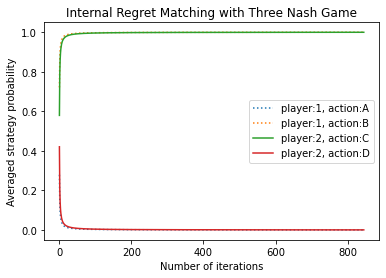

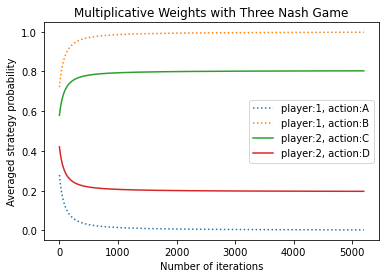

In [175]:
plot_comparison_MWA_vs_IRM(game_three_nash, "Three Nash Game",  initial_random_distribution(game_three_nash))

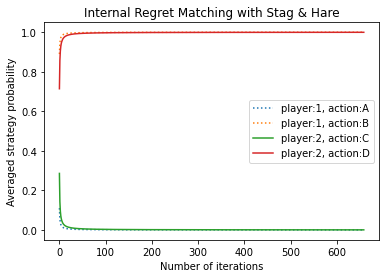

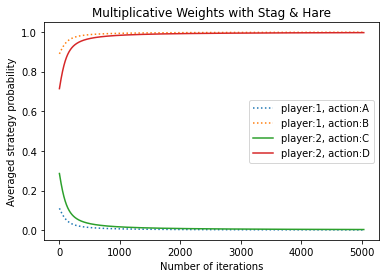

In [51]:
plot_comparison_MWA_vs_IRM(stag_and_hare, "Stag & Hare", initial_random_distribution(stag_and_hare))

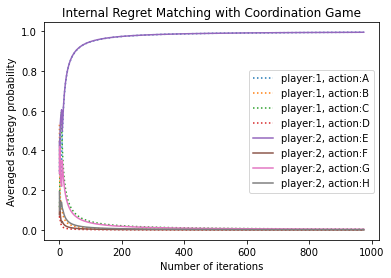

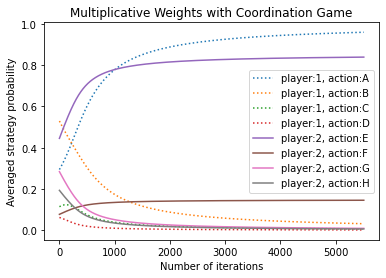

In [182]:
plot_comparison_MWA_vs_IRM(coordination_game, "Coordination Game", initial_random_distribution(coordination_game), epsilon = 0.00001)

In [179]:
coordination_game

[[[1, 1], [1, 1], [0, 0], [0, 0]],
 [[0.5, 0.5], [0.5, 0.5], [-0.5, -0.5], [-0.5, -0.5]],
 [[0, 0], [0, 0], [1, 1], [1, 1]],
 [[-0.5, -0.5], [-0.5, -0.5], [0.5, 0.5], [0.5, 0.5]]]

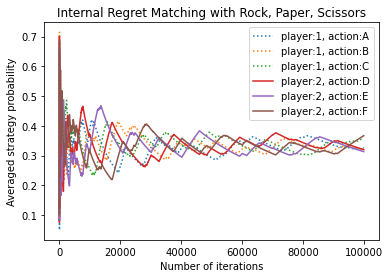

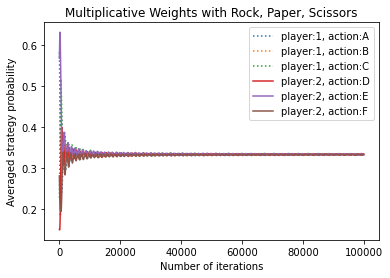

In [84]:
plot_comparison_MWA_vs_IRM(schere_stein_papier, "Rock, Paper, Scissors", initial_random_distribution(schere_stein_papier))

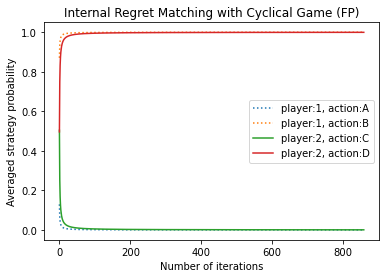

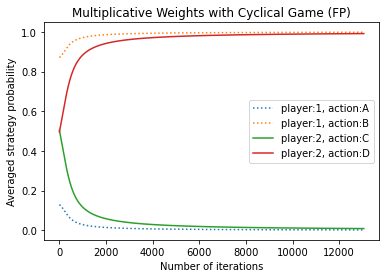

In [85]:
plot_comparison_MWA_vs_IRM(ficticious_play_cycles, "Cyclical Game (FP)", initial_random_distribution(ficticious_play_cycles))

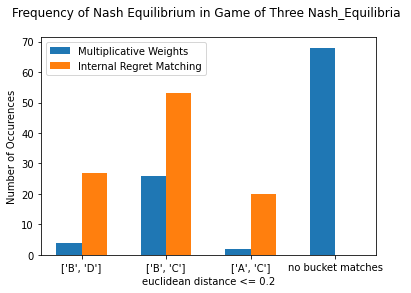

In [46]:
plot_absolute_nash_frequency(game_three_nash, 100, 100,"Game of Three Nash_Equilibria",nashEqs["game_three_nash"], 0.2)

[['A', 'C'], ['B', 'D']]


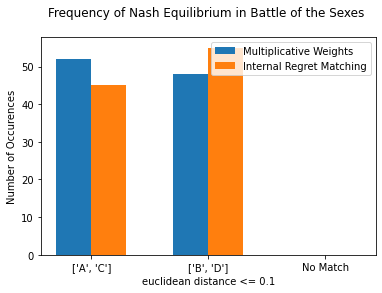

In [90]:
plot_absolute_nash_frequency(battle_of_sexes, 2000, 100,"Battle of the Sexes", nashEqs["battle_of_sexes"], 0.1)

[['A', 'D'], ['B', 'C']]


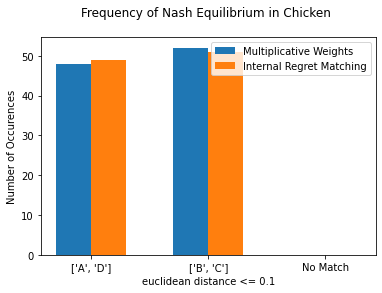

In [93]:
plot_absolute_nash_frequency(chicken, 2000, 100,"Chicken", nashEqs["chicken"] , 0.1)

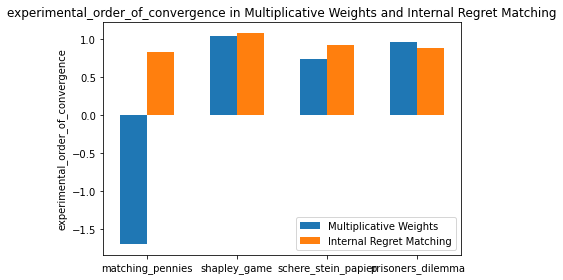

In [74]:
plot_all_games_experimental_convergence_speed(games, nashEqs, experimental_order_of_convergence)

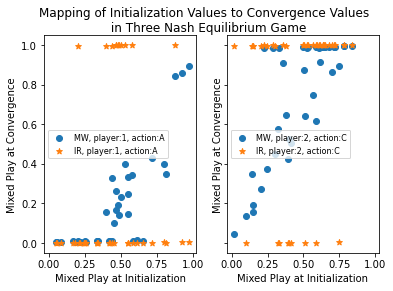

In [71]:
plot_input_output_mapping(game_three_nash,"Three Nash Equilibrium Game", 100000, 40)

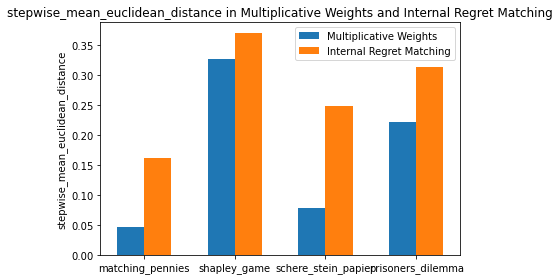

In [75]:
plot_all_games_experimental_convergence_speed(games, nashEqs, stepwise_mean_euclidean_distance)

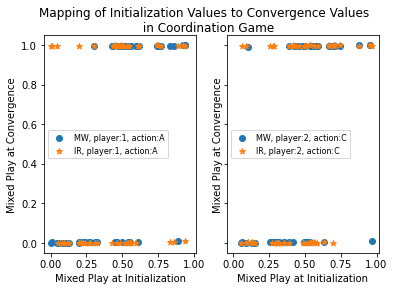

In [95]:
plot_input_output_mapping(coordination_game_2, "Coordination Game", 2000, 50)

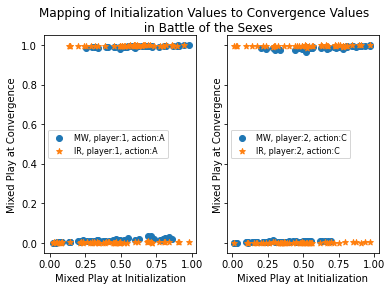

In [91]:
plot_input_output_mapping(battle_of_sexes, "Battle of the Sexes", 2000, 100)

<string>:4: RuntimeWarning: divide by zero encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


IR_DONE
MW_DONE
IR_DONE
MW_DONE
IR_DONE
MW_DONE
IR_DONE
MW_DONE
IR_DONE
MW_DONE


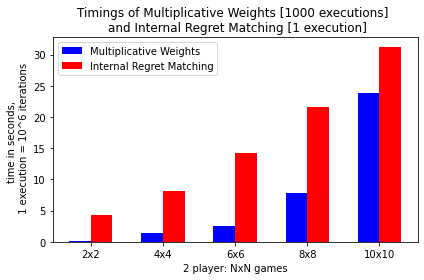

In [50]:
plot_runtimes_with_iterations(100000)

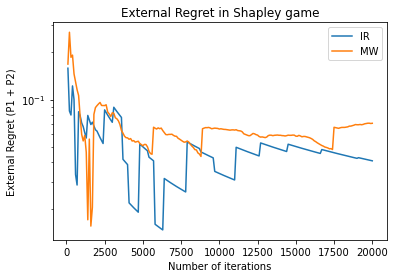

In [135]:
plot_total_regret(shapley_game, "Shapley game", 20000)

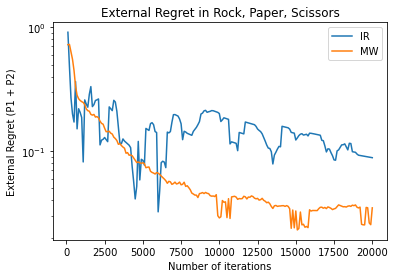

In [138]:
plot_total_regret(schere_stein_papier, "Rock, Paper, Scissors", 20000)

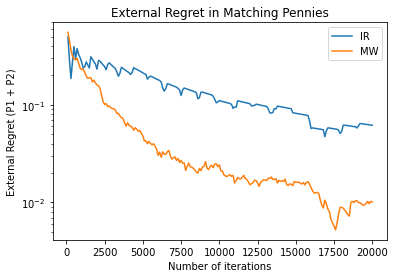

In [139]:
plot_total_regret(matching_pennies, "Matching Pennies", 20000)

200
200


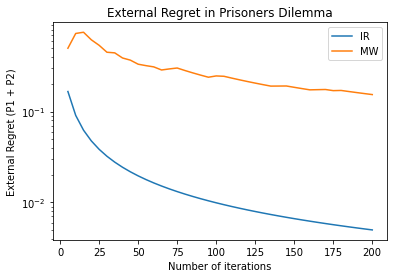

In [174]:
plot_total_regret(prisoners_dilemma, "Prisoners Dilemma", 200, scaling = 5)

In [154]:
plot_player_regret(matching_pennies, "matching_pennies", 10000)

KeyboardInterrupt: 

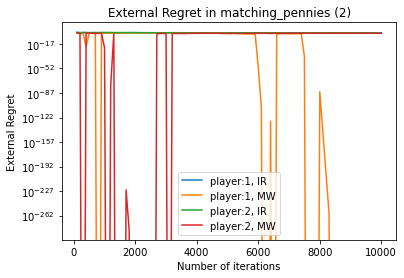

In [126]:
plot_player_regret(matching_pennies, "matching_pennies (2)", 10000)

[72  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 28] [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
[53  4  3  2  1  1  1  1  4  1  3  1  2  3  1  1  0  1  1  0  1  1  0  1
  1  1  1  0  0  1  2  0  2  2  0  0  1  0  0  0  0  0  0  1  0  0  0  0
  1] [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.244

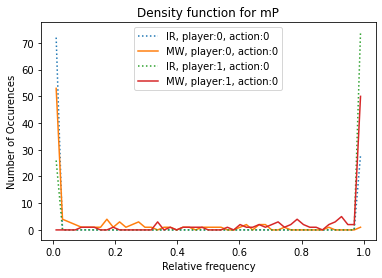

In [198]:
plot_relative_frequency(game_three_nash, 1000, 100, "mP", bins = np.linspace(0.0, 1.0, 50))